#Algoritma Apriori

Algoritma Apriori salah satu algoritma data mining dalam pembentukan asosiasi rule
mining. Algoritma apriori adalah proses ekstraksi informasi dari suatu database,
dilanjutkan dengan melakukan frequent item/itemset dan candidate generation dalam
pembentukan asosiasi rule mining guna mendapatkan hasil nilai minimum support dan hasil
nilai minimum confidence. Pada database yang cukup besar, algoritma apriori banyak
menghasilkan pattern frequent item/itemset (pola sering muncul suatu item/itemset) yang
banyak, karena harus melakukan candidate generation serta merekam database secara
berulang-ulang.


###Kelebihan Algoritma Apriori
Sederhana dan mudah dipahami di antara algoritma asosiasi

Aturan yang dihasilkan intuitif dan mudah dikomunikasikan ke pengguna awam

Tidak memerlukan data berlabel karena merupakan algoritma unsupervised

Algoritmanya lengkap, sehingga dapat menemukan semua aturan dengan support dan confidence yang ditentukan


###Kekurangan Algoritma Apriori
Membutuhkan banyak perhitungan jika itemset sangat besar dan nilai support minimal dipertahankan seminimal mungkin.

Perlu melakukan pemindaian penuh seluruh database. Hal ini membuat proses pada algoritma Apriori berjalan sangat lama dan lambat serta menghabiskan banyak sumber daya.

Karena perlu melakukan pemindaian penuh, kompleksitas waktu dan ruang dari algoritma apriori adalah O(2D), yang berarti sangat tinggi. Simbol D mewakili lebar horizontal yang ada dalam database

##Import Pandas & Membaca Dataset dari Google Drive



import pandas as pd #Mengimport data

df=pd.read_csv('/content/drive/MyDrive/GroceryStoreDataSet.csv',names=["products"],header=None) #Membaca dataset GroceryStoreDataSet.csv dari Google Drive hanya menampilkan bagian produknya saja

df # Menampilkan dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Alfamyday.csv',names=["produk"],header=None)
df

,produk
0,"ROTI,SUSU,SELAI,MENTEGA,MESES"
1,"SUSU,KOPI,TEH,GULA"
2,"TEH,GULA,BISKUIT,ROKOK"
3,"KOPI,ROKOK,WAFER,BISKUIT"
4,"BUAVITA,WAFER,ROTI"
5,"WAFER,ROTI,BISKUIT"
6,"ROKOK,KOREK,KOPI"
7,"BUAVITA,TEH,WAFER"
8,"BUAVITA,CHITATO,PRINGLES"
9,"ICE CREAM,COKLAT,SODA"


In [ ]:
df.columns

Index(['produk'], dtype='object')

In [ ]:
# menampilkan nilai-nilai dalam DataFrame 'df'.
df.values

array([['ROTI,SUSU,SELAI,MENTEGA,MESES'],
       ['SUSU,KOPI,TEH,GULA'],
       ['TEH,GULA,BISKUIT,ROKOK'],
       ['KOPI,ROKOK,WAFER,BISKUIT'],
       ['BUAVITA,WAFER,ROTI'],
       ['WAFER,ROTI,BISKUIT'],
       ['ROKOK,KOREK,KOPI'],
       ['BUAVITA,TEH,WAFER'],
       ['BUAVITA,CHITATO,PRINGLES'],
       ['ICE CREAM,COKLAT,SODA'],
       ['SODA,ROTI,WAFER'],
       ['ICE CREAM,WAFER,BISKUIT'],
       ['COKLAT,BISKUIT,WAFER'],
       ['SAOS,CUKA,KECAP'],
       ['KECAP,GARAM,MINYAK'],
       ['MINYAK,GULA,GARAM,SAOS,KECAP'],
       ['MINYAK,BERAS,KECAP,TELUR'],
       ['TELUR,MINYAK,BERAS,TEH,GULA'],
       ['ROKOK,KOPI,TEH,BISKUIT'],
       ['GULA,GARAM,KECAP,GARAM'],
       ['TELUR,ROTI,TERIGU,MENTEGA'],
       ['TERIGU,MENTEGA,GULA,SUSU,MESES'],
       ['MESES,SUSU,ROTI,MENTEGA'],
       ['ICE CREAM,SODA,ROTI,PRINGLES'],
       ['CHITATO,SUSU,BUAVITA,WAFER'],
       ['BUAVITA,COKLAT,PRINGLES'],
       ['COKLAT,SUSU,BISKUIT,WAFER'],
       ['KECAP,GARAM,MINYAK,SAOS'],
       ['KOP

data=list(df["products"].apply(lambda x:x.split(','))) # Kolom "products" dari DataFrame 'df' diambil dan diaplikasikan fungsi split(',') pada setiap barisnya.
Fungsi ini memecah teks dalam kolom menjadi daftar produk yang dipisahkan oleh tanda koma (',').
Hasilnya adalah daftar produk-produk dari dataset, dan daftar tersebut disimpan dalam variabel 'data'.

data # Menampilkan data

In [ ]:
data=list(df["produk"].apply(lambda x:x.split(',')))
data

[['ROTI', 'SUSU', 'SELAI', 'MENTEGA', 'MESES'],
 ['SUSU', 'KOPI', 'TEH', 'GULA'],
 ['TEH', 'GULA', 'BISKUIT', 'ROKOK'],
 ['KOPI', 'ROKOK', 'WAFER', 'BISKUIT'],
 ['BUAVITA', 'WAFER', 'ROTI'],
 ['WAFER', 'ROTI', 'BISKUIT'],
 ['ROKOK', 'KOREK', 'KOPI'],
 ['BUAVITA', 'TEH', 'WAFER'],
 ['BUAVITA', 'CHITATO', 'PRINGLES'],
 ['ICE CREAM', 'COKLAT', 'SODA'],
 ['SODA', 'ROTI', 'WAFER'],
 ['ICE CREAM', 'WAFER', 'BISKUIT'],
 ['COKLAT', 'BISKUIT', 'WAFER'],
 ['SAOS', 'CUKA', 'KECAP'],
 ['KECAP', 'GARAM', 'MINYAK'],
 ['MINYAK', 'GULA', 'GARAM', 'SAOS', 'KECAP'],
 ['MINYAK', 'BERAS', 'KECAP', 'TELUR'],
 ['TELUR', 'MINYAK', 'BERAS', 'TEH', 'GULA'],
 ['ROKOK', 'KOPI', 'TEH', 'BISKUIT'],
 ['GULA', 'GARAM', 'KECAP', 'GARAM'],
 ['TELUR', 'ROTI', 'TERIGU', 'MENTEGA'],
 ['TERIGU', 'MENTEGA', 'GULA', 'SUSU', 'MESES'],
 ['MESES', 'SUSU', 'ROTI', 'MENTEGA'],
 ['ICE CREAM', 'SODA', 'ROTI', 'PRINGLES'],
 ['CHITATO', 'SUSU', 'BUAVITA', 'WAFER'],
 ['BUAVITA', 'COKLAT', 'PRINGLES'],
 ['COKLAT', 'SUSU', 'BISKUIT', '

## Encoder

te=TransactionEncoder() # Mengimpor pustaka mlxtend.preprocessing dan
mengambil kelas TransactionEncoder yang digunakan untuk melakukan encoding data transaksi.

from mlxtend.preprocessing import TransactionEncoder
Membuat objek TransactionEncoder yang akan digunakan untuk melakukan encoding data transaksi.

te_data=te.fit(data).transform(data) #Membuat variabel te_data.

te.fit(data): Melatih TransactionEncoder dengan data transaksi yang disimpan dalam variabel data
te.transform(data): Mengubah data transaksi menjadi bentuk encoded, di mana setiap baris dalam DataFrame akan mewakili satu transaksi, dan setiap kolom akan mewakili satu item. Nilai dalam DataFrame akan berupa True atau False, menunjukkan apakah item tersebut ada dalam transaksi tersebut atau tidak.

df=pd.DataFrame(te_data,columns=te.columns_) # Membuat DataFrame Pandas baru, df, dengan data encoded dari langkah sebelumnya.

te.columns_ digunakan untuk mengambil nama kolom dari TransactionEncoder yang sesuai dengan item-item yang ada dalam data transaksi.
Kolom-kolom dalam DataFrame ini akan mewakili item-item yang ada dalam data transaksi, setiap baris akan mewakili satu transaksi.

df # Menampilkan data

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_data=te.fit(data).transform(data)
df=pd.DataFrame(te_data,columns=te.columns_)
df

,BERAS,BISKUIT,BUAVITA,CHITATO,COKLAT,CUKA,GARAM,GULA,ICE CREAM,KECAP,...,ROKOK,ROTI,SAOS,SELAI,SODA,SUSU,TEH,TELUR,TERIGU,WAFER
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
2,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


## Penerapan Algoritma Apriori

from mlxtend.frequent_patterns import apriori: mengimpor fungsi apriori dari library mlxtend.frequent_patterns. Fungsi ini digunakan untuk menerapkan algoritma Apriori pada data.

df1 = apriori(df, min_support=0.01, use_colnames=True) # Membuat variabel df1

df adalah DataFrame yang berisi data transaksi yang telah diencode sebelumnya.
min_support=0.01 adalah parameter yang menentukan batasan minimum dukungan (support) yang diperlukan untuk item-item yang akan dianggap sebagai itemset yang sering muncul.

use_colnames=True digunakan untuk mengganti nama kolom dengan nama item asli

df1 = Membaca DataFrame1

In [ ]:
from mlxtend.frequent_patterns import apriori
df1=apriori(df,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.066667,(BERAS)
1,0.266667,(BISKUIT)
2,0.200000,(BUAVITA)
3,0.100000,(CHITATO)
4,0.133333,(COKLAT)
...,...,...
256,0.033333,"(WAFER, ROTI, ROKOK, BISKUIT, KOPI)"
257,0.033333,"(SUSU, PRINGLES, BUAVITA, ICE CREAM, CHITATO)"
258,0.033333,"(KECAP, GARAM, SAOS, GULA, MINYAK)"
259,0.033333,"(MENTEGA, MESES, SUSU, TERIGU, GULA)"


## Association Rules


from mlxtend.frequent_patterns import association_rules #Mengimpor fungsi association_rules dari pustaka mlxtend.frequent_patterns. Digunakan untuk menghasilkan aturan asosiasi dari frequent itemsets.

rules = association_rules(df1, metric="lift", min_threshold=1): Ini adalah langkah utama dalam program:

df1 adalah DataFrame yang berisi frequent itemsets yang dihasilkan oleh algoritma Apriori.
metric="lift" adalah parameter yang menentukan metrik yang akan digunakan untuk mengukur kualitas aturan asosiasi.
Lift adalah ukuran sejauh mana dua item bersamaan lebih sering dibeli daripada yang diharapkan secara acak. Aturan asosiasi dengan nilai lift di atas 1 menunjukkan bahwa item-item tersebut memiliki korelasi positif.

min_threshold=1 adalah parameter yang menentukan nilai ambang minimum untuk metrik yang digunakan.

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(df1, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GULA),(BERAS),0.200000,0.066667,0.033333,0.166667,2.500000,0.020000,1.120000,0.750000
1,(BERAS),(GULA),0.066667,0.200000,0.033333,0.500000,2.500000,0.020000,1.600000,0.642857
2,(KECAP),(BERAS),0.200000,0.066667,0.033333,0.166667,2.500000,0.020000,1.120000,0.750000
3,(BERAS),(KECAP),0.066667,0.200000,0.033333,0.500000,2.500000,0.020000,1.600000,0.642857
4,(MINYAK),(BERAS),0.166667,0.066667,0.066667,0.400000,6.000000,0.055556,1.555556,1.000000
...,...,...,...,...,...,...,...,...,...,...
1435,(MENTEGA),"(ROTI, MESES, SUSU, SELAI)",0.133333,0.033333,0.033333,0.250000,7.500000,0.028889,1.288889,1.000000
1436,(MESES),"(ROTI, MENTEGA, SUSU, SELAI)",0.100000,0.033333,0.033333,0.333333,10.000000,0.030000,1.450000,1.000000
1437,(SUSU),"(ROTI, MENTEGA, MESES, SELAI)",0.233333,0.033333,0.033333,0.142857,4.285714,0.025556,1.127778,1.000000
1438,(ROTI),"(MENTEGA, MESES, SUSU, SELAI)",0.266667,0.033333,0.033333,0.125000,3.750000,0.024444,1.104762,1.000000


In [ ]:
#nilai liftnya itu lebih dari sama dengan 2 dan
# nilai dari confidence yaitu lebih dari sama dengan satu
rules[(rules['lift']>=2)&
      (rules['confidence']>= 1.0) ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(BERAS),(MINYAK),0.066667,0.166667,0.066667,1.0,6.0,0.055556,inf,0.892857
9,(BERAS),(TELUR),0.066667,0.100000,0.066667,1.0,10.0,0.060000,inf,0.964286
21,(CHITATO),(BUAVITA),0.100000,0.200000,0.100000,1.0,5.0,0.080000,inf,0.888889
53,(CUKA),(KECAP),0.033333,0.200000,0.033333,1.0,5.0,0.026667,inf,0.827586
54,(CUKA),(SAOS),0.033333,0.100000,0.033333,1.0,10.0,0.030000,inf,0.931034
...,...,...,...,...,...,...,...,...,...,...
1428,"(MENTEGA, SELAI)","(ROTI, MESES, SUSU)",0.033333,0.066667,0.033333,1.0,15.0,0.031111,inf,0.965517
1431,"(MESES, SELAI)","(ROTI, MENTEGA, SUSU)",0.033333,0.066667,0.033333,1.0,15.0,0.031111,inf,0.965517
1433,"(SUSU, SELAI)","(ROTI, MENTEGA, MESES)",0.033333,0.066667,0.033333,1.0,15.0,0.031111,inf,0.965517
1434,"(ROTI, SELAI)","(MENTEGA, MESES, SUSU)",0.033333,0.100000,0.033333,1.0,10.0,0.030000,inf,0.931034


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'lift vs confidence')

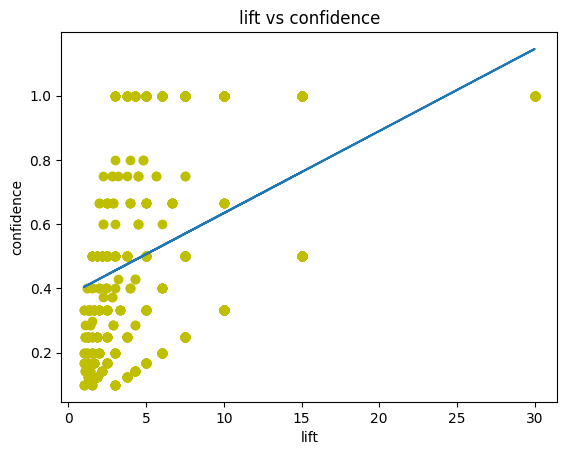

In [37]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('confidence')
plt.title('lift vs confidence')

sort_values(by="support", ascending=False): mengurutkan DataFrame df1 berdasarkan kolom "support".

by="support": mengurutkan berdasarkan kolom "support".

ascending=False: mengurutkan secara menurun, sehingga frequent itemsets dengan support tertinggi akan muncul terlebih dahulu.

In [ ]:
df1.sort_values(by="support",ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
25,0.333333,(WAFER)
1,0.266667,(BISKUIT)
17,0.266667,(ROTI)
21,0.233333,(SUSU)
2,0.200000,(BUAVITA)
...,...,...
127,0.033333,"(MINYAK, TEH, BERAS)"
129,0.033333,"(TELUR, TEH, BERAS)"
132,0.033333,"(GULA, ROKOK, BISKUIT)"
133,0.033333,"(GULA, TEH, BISKUIT)"


In [ ]:
# ["length"]: memberi nama "length" baru ke kolom yang akan ditambahkan ke dalam DataFrame. .
# df1["itemsets"]:mengakses kolom "itemsets" dalam DataFrame df1.
# lambda x: len(x) digunakan untuk menghitung jumlah item dalam setiap frequent itemset x.
#.apply(lambda x: len(x)): Ini adalah metode apply yang digunakan untuk menerapkan fungsi lambda pada setiap baris kolom "itemsets".
# Fungsi lambda x: len(x) digunakan untuk menghitung jumlah item dalam setiap frequent itemset x.
df1["length"]=df1["itemsets"].apply(lambda x:len(x))
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.066667,(BERAS),1
1,0.266667,(BISKUIT),1
2,0.200000,(BUAVITA),1
3,0.100000,(CHITATO),1
4,0.133333,(COKLAT),1
...,...,...,...
256,0.033333,"(WAFER, ROTI, ROKOK, BISKUIT, KOPI)",5
257,0.033333,"(SUSU, PRINGLES, BUAVITA, ICE CREAM, CHITATO)",5
258,0.033333,"(KECAP, GARAM, SAOS, GULA, MINYAK)",5
259,0.033333,"(MENTEGA, MESES, SUSU, TERIGU, GULA)",5


In [ ]:
# Mengambil Itemsets yang memiliki panjang ==2 dan Mengambil Itemsets yang jumlahnya >0.05
df1[(df1["length"]==2) & (df1["support"]>0.05)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
28,0.066667,"(MINYAK, BERAS)",2
30,0.066667,"(TELUR, BERAS)",2
31,0.066667,"(COKLAT, BISKUIT)",2
34,0.100000,"(KOPI, BISKUIT)",2
35,0.133333,"(ROKOK, BISKUIT)",2
36,0.066667,"(ROTI, BISKUIT)",2
38,0.066667,"(TEH, BISKUIT)",2
39,0.200000,"(WAFER, BISKUIT)",2
40,0.100000,"(BUAVITA, CHITATO)",2
43,0.100000,"(BUAVITA, PRINGLES)",2
